<a href="https://colab.research.google.com/github/rmusti/Tensorflow_Simple_programs/blob/master/Tensorflow_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# prediction using the regression model 
1.   Input x: tf_x defined as a placeholder
2.   Input y: tf_y defined as a placeholder'
3.   Model parameter w: weight defined as a variable
4.   Model parameter b: bias defined as a variable
5.  Model output : y_hat returned by the TensorFlow operations to compute the














In [0]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

with g.as_default():
  tf.set_random_seed(123)
  ## placeholders
  tf_x = tf.placeholder(tf.float32 , name = 'tf_x')
  tf_y = tf.placeholder(tf.float32 , name = 'tf_y')
  
  ## define the variable (model parameters)
  w = tf.Variable(tf.random_normal(shape = (1,1), stddev = 0.25 ), name = 'w')
  b = tf.Variable(0.0, name = 'b')
  
  ## build the model
  y_hat = tf.add( tf_x * w , b, name = 'y_hat')
  
  ## compute the cost
  cost = tf.reduce_mean(tf.square(tf_y - y_hat) , name = 'cost')
  
  ## train the model
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
  train_op = optimizer.minimize(cost, name = 'train_op')
  
  
  
  
  
  
  

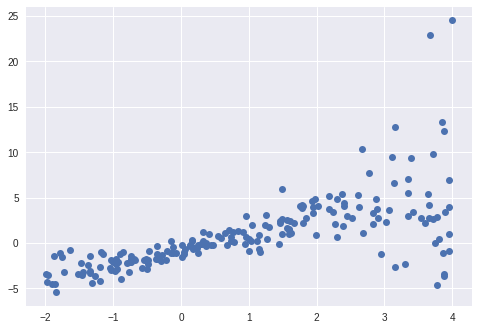

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def make_Random_data():
    np.random.seed(100)
    x = np.random.uniform(low = -2, high = 4 , size = 200)
    y = []
    
    for t in x:
      r = np.random.normal( loc=0.0, scale= (0.5 + t*t/3) , size=None)
      y.append(r)
    return x,  1.726*x -0.84 + np.array(y)  
    
x , y =  make_Random_data()

plt.plot(x , y ,'o')
plt.show()

 

Epoch:    0 : 15.4777
Epoch:   50 : 0.7947
Epoch:  100 : 0.5758
Epoch:  150 : 0.5364
Epoch:  200 : 0.5290
Epoch:  250 : 0.5276
Epoch:  300 : 0.5273
Epoch:  350 : 0.5273
Epoch:  400 : 0.5273
Epoch:  450 : 0.5273


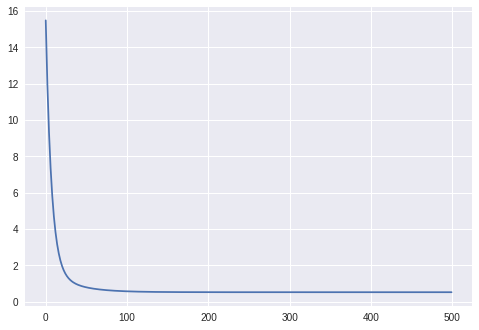

In [40]:
## split train and tests

x_train , y_train = x[:100] , y[:100]
x_test , y_test = x[100:] , y[100:]
n_epoch = 500

with tf.Session(graph = g) as sess:
  sess.run(tf.global_variables_initializer())
  
  training_cost = []
  for e in range(n_epoch):
    c,_ = sess.run( [ cost , train_op], feed_dict = { tf_x : x_train , tf_y : y_train} )
    training_cost.append(c)
    if not e% 50:
      print('Epoch: %4d : %.4f' % (e, c))
      
      
  plt.plot(training_cost)
  plt.show()
   
    
    

  